### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent Variable - Words condition either congruent or incongruent.

Dependent Variable - the response time to complete the test.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Hypothesis Test 

H0 - The Null Hypothesis (μc ≥ μi). The average time to name the colour of the ink the words printed for congruent words should be equal to or greater than the average time for incongruent words.   

Ha - The Alternative Hypothesis (μc < μi). The average time for congruent words is less than the average time for incongruent words. 



H0: μc ≥ μi - population mean for congruent words equal to or greater than the population mean for incongruent words. 

Ha: μc < μi - population mean for congruent words less than population mean for incongruent words. 


Dependent Samples t-test

-require to compare the average time to name the colour of the inks for congruent and incongruent words and to have enough evidence to determine the hypothesis that congruent words is less than incongruent words.     

-the sample size is less than 30 so a t-test is statistically appropriate as the population parameter is not known, therefore, a z-test can not be performed here.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stroopdata.csv')
print(df)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [4]:
print('Mean') 

print(round(df.mean(),2))

Mean
Congruent      14.05
Incongruent    22.02
dtype: float64


In [5]:
print('Standard Deviation')

print(round(df.std(),2))

Standard Deviation
Congruent      3.56
Incongruent    4.80
dtype: float64


In [6]:
print('Standard Error for Congruent Variable')
SE_c = round(stats.sem(df.iloc[:,0]),2)
print(SE_c)

Standard Error for Congruent Variable
0.73


In [7]:
print('Standard Error for Incongruent Variable')
SE_i = round(stats.sem(df.iloc[:,1]),2)
print(SE_i)

Standard Error for Incongruent Variable
0.98


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

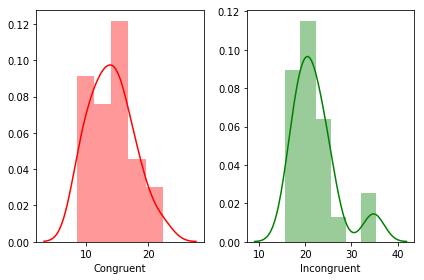

In [8]:
plt.subplot(1,2,1)
sns.distplot(df['Congruent'], color='r')
plt.subplot(1,2,2)
sns.distplot(df['Incongruent'], color='g')
plt.tight_layout()
plt.show()


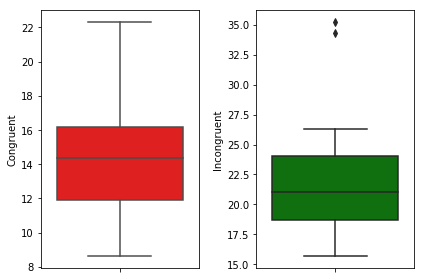

In [36]:
plt.subplot(1,2,1)
sns.boxplot(data=df, y='Congruent', color='r')

plt.subplot(1,2,2)

sns.boxplot(data=df, y='Incongruent', color='g')

plt.tight_layout()
plt.show()

The plot for Congruent words distribution is between 8 and 23 seconds plus the average response time completing the test is lower than the Incongruent words distribution which is between 15 and 27 seconds with an outlier of 34 seconds.      

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [9]:
print('Sample Size') 

n = len(df)
print(n)

Sample Size
24


In [10]:
print('Degrees of Freedom')
print(len(df)-1)

Degrees of Freedom
23


In [35]:
print('Point Estimate of the two means')

c_mean = df['Congruent'].mean()
i_mean = df['Incongruent'].mean()

pe = c_mean - i_mean 
print(pe)

Point Estimate of the two means
-7.964791666666665


In [26]:
print('T Critical Value @ Confidence Level: 95% and Degrees of Freedom: 23') 

t.ppf(0.05, 23)

T Critical Value @ Confidence Level: 95% and Degrees of Freedom: 23


-1.7138715277470478

In [27]:
print('Standard Deviation Difference')

diff = df.Congruent - df.Incongruent 

std_diff = round(diff.std(),2)

print(std_diff)

Standard Deviation Difference
4.86


In [28]:
print('T-Statistic')

print(round(pe/(std_diff/ math.sqrt(n)),4))

T-Statistic
-8.0287


The t-statistic is -8.03 with the confidence level at 95% and a=0.05. This shows that the t-statistic is greater than the t-critical value (-1.71) and is in the critical region meaning p<0.05. Therefore, we reject the Null Hypothesis meaning the average response time to name the colour of the ink the words printed for congruent words is less than incongruent words.   


## References

https://faculty.washington.edu/chudler/words.html 


https://www.theguardian.com/science/head-quarters/2016/jul/25/the-stroop-test-how-colourful-is-your-language